# Reproduce the Bulk modulus:
Train multiple GAPs with the same parameters to get a mean and a standard deviation (Error bar). Simply copy the  example_dir_hetsys or example_dir_avon (depending on which machine you want to use, README.txt has info on what is inside each and how to run each case) into another folder (run001, for example). make a few copies of these directories, and run job.sh script in each directory. This will make a potential in each of those directories. The follow the bellow.

In [2]:
import itertools
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nglview
from ase.io import read

In this notebook we will go through how to run the testing-framework: https://github.com/libAtoms/testing-framework

You can clone into the repo yourself and work from within that, or you can work from inside this gap_fit_example repo. It doen't matter beyond making sure you have the right paths set etc.

One thing to note if things break, you need to have matscipy installed:

pip install matscipy


In [3]:
top_directory = os.path.expanduser('~/gap_fit_exercise/')
os.chdir(top_directory)
#We are changing into the the following directory:
os.chdir('testing-framework/example_models/TiAl/run_dir_hcp_Ti/')
#this is where we will run the testing-framework to calculate the bulk modulus for a given potential.
print(os.getcwd())

/home/physics/phspnt/gap_fit_exercise/testing-framework/example_models/TiAl/run_dir_hcp_Ti


In [42]:
#to now run the a test to calculate the bulk modulus + other elastic constants we use the following:
#remember using ! means we are effectively typing this in the termal (you can do it there if you want!)
!../../../scripts/run-model-test.py -l TiAl  TiAl_example_model_000 bulk_Ti_hcp
#what this is doing is running a single test from the test directory TiAl for our model TiAl_example_model_000.
#The test we are running is on bulk hcp Ti.
#running it again on a "different" model. This is actually the same GAP, just labelled in a different folder.
#with corresponding name change in the model.py.
!../../../scripts/run-model-test.py -l TiAl  TiAl_example_model_001 bulk_Ti_hcp

share_dir /home/physics/phspnt/gap_fit_exercise/testing-framework/scripts/../share
../TiAl-model-TiAl_example_model_000-test-bulk_Ti_hcp-properties.json already exists and is not empty, not rerunning test
share_dir /home/physics/phspnt/gap_fit_exercise/testing-framework/scripts/../share


In [4]:
#now we want to load in the data that we have just calculated!
def read_data(model_names):
    data = {}
    for model_name in model_names:
        json_file = f"TiAl-model-{model_name}-test-bulk_Ti_hcp-properties.json"
        model_name = os.path.basename(json_file).split('-')[2]
        data[model_name] = json.load(open(json_file))
    return data
#here we can have a list of different models. 
test_models = read_data(['TiAl_example_model_000',
                        'TiAl_example_model_001'])

#lets put this in a dataframe and get rid of the energy volume curves to clean it up.
df = pd.DataFrame(test_models)
df = df.drop('E_vs_V')
B = df.loc['B']
df

,TiAl_example_model_000,TiAl_example_model_001
B,113.153,113.153
c11,160.312,160.312
c12,66.5138,66.5138
c13,75.9293,75.9293
c33,305.938,305.938
c44,29.5906,29.5906
c66,55.2971,55.2971


Text(0.5, 0, 'model name')

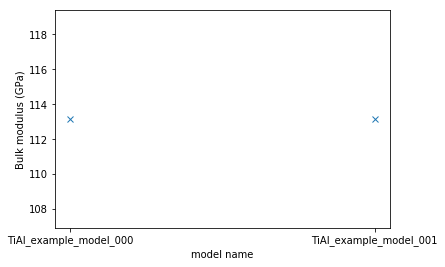

In [5]:
#CASTEP predictions (GPa), taken to be the 'true' value:
B_truth = 129.441
c11_truth = 210.222
c12_truth = 79.9337
c13_truth = 94.0298
c33_truth = 209.045
c44_truth = 35.4864
c66_truth = 64.6349


#Final GAP developed that was used in MCMD:
B_CA_gap= 132.53
c11_CA_gap= 223.449
c12_CA_gap= 86.5253
c13_CA_gap= 85.1746
c33_CA_gap= 232.253
c44_CA_gap= 34.2708
c66_CA_gap= 71.9269

#Average across sparse points (11 GAPs with the same paramters to get error bars)
#B_mean_gap= 131.950 +/- 0.809
#c11_mean_gap=219.663 +/- 2.688
#c12_mean_gap=82.0240 +/- 3.616
#c13_mean_gap=86.406 +/- 1.686
#c33_mean_gap=240.106 +/- 3.824
#c44_mean_gap=35.869 +/- 0.936
#c66_mean_gap=71.674 +/- 2.398


plt.plot(B, 'x')
plt.ylabel('Bulk modulus (GPa)')
plt.xlabel('model name')